# EXPLORATORY DATA ANALYSIS 
### Purpose 
1.To determine the relationship between the dependent and independent variables.

In [1]:
#importing the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from pandasql import sqldf
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")

During the analysis it was noticed that stop_resolution and arrest flag had similar values.One of this is to be the dependent variable.let us look at their correlation. 

In [2]:
#loading the data
df=pd.read_csv("EDA_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61459 entries, 0 to 61458
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         61459 non-null  int64 
 1   Subject Age Group  61459 non-null  object
 2   GO / SC Num        61459 non-null  int64 
 3   Stop Resolution    61459 non-null  object
 4   Weapon Type        61459 non-null  object
 5   Officer YOB        61459 non-null  int64 
 6   Initial Call Type  61459 non-null  object
 7   Final Call Type    61459 non-null  object
 8   Call Type          61459 non-null  object
 9   Officer Squad      61459 non-null  object
 10  Arrest Flag        61459 non-null  int64 
 11  Frisk Flag         61459 non-null  int64 
 12  Precinct           61459 non-null  object
 13  Sector             61459 non-null  object
 14  Beat               61459 non-null  object
 15  reported_Year      61459 non-null  int64 
 16  reported_Month     61459 non-null  int64

In [4]:
#dropping the collumn Unnamed: 0
df=df.drop(columns=["Unnamed: 0"])

### 1.What is the distribution of terry stops over the years

In [5]:
#Create a lambda function to pass locals or globals to pandasql
pysqldf = lambda q:sqldf(q, globals())

In [6]:
q1="""
SELECT reported_Year,COUNT("Arrest Flag")as "terry_stops"
FROM df
GROUP BY reported_Year
"""
year_vs_arrest=pysqldf(q1)
year_vs_arrest

,reported_Year,terry_stops
0,2015,6746
1,2016,7704
2,2017,7469
3,2018,8851
4,2019,8190
5,2020,6128
6,2021,4228
7,2022,4626
8,2023,4049
9,2024,3468


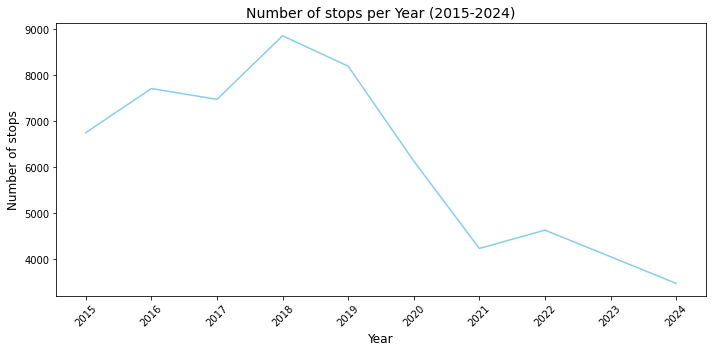

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(year_vs_arrest["reported_Year"], year_vs_arrest["terry_stops"], color='skyblue')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of stops', fontsize=12)
plt.title('Number of stops per Year (2015-2024)', fontsize=14)
plt.xticks(year_vs_arrest["reported_Year"], rotation=45)
plt.tight_layout()
plt.show()


### observation
The data shows that the number of terry stops steadily increased from the year 2015 with the peak number of terry stops being in the year 2018.There after,the number of terry stops decreased with the record lowest being in 2024 with only 3468 terry stops.

### 2. How many terry stops led to an arrest?

In [8]:
q2="""
SELECT "Arrest Flag" ,COUNT("Arrest Flag") AS "outcome"
FROM df
GROUP BY "Arrest Flag"
"""
arrest=pysqldf(q2)
arrest

,Arrest Flag,outcome
0,0,54699
1,1,6760


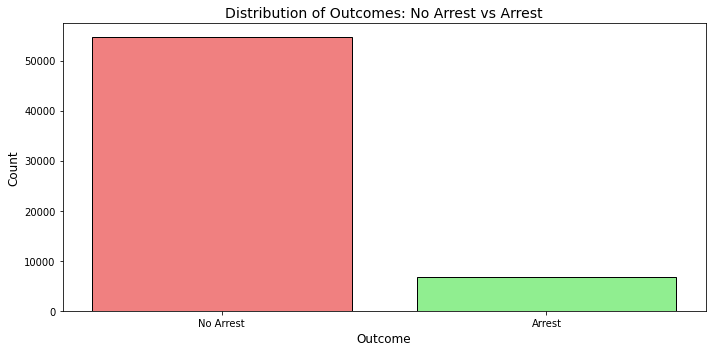

In [9]:
plt.figure(figsize=(10, 5))
outcomes = ["No Arrest", "Arrest"]# Replacing arrest["outcome"] and arrest["Arrest Flag"] with the correct mappings
counts = [54699, 6760]
plt.bar(outcomes, counts, color=['lightcoral', 'lightgreen'], edgecolor='black')
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Outcomes: No Arrest vs Arrest', fontsize=14)
plt.tight_layout()  
plt.show()

### Observation 
It is observed that the arrests made were 6760 accounting for only 10% of the total observations.This begs the question should terry stops be stopped?

### 3.what arrests were made based on the call type?

In [10]:
q3 = """
SELECT "Call Type", COUNT(*) AS "Arrest Count"
FROM df
WHERE "Arrest Flag" = 1
GROUP BY "Call Type"
ORDER BY "Arrest Count" DESC
"""
arrest_call = pysqldf(q3)
print(arrest_call)


                       Call Type  Arrest Count
0                            911          4506
1                         ONVIEW          1421
2       TELEPHONE OTHER, NOT 911           502
3              Call Type UNKNOWN           234
4  ALARM CALL (NOT POLICE ALARM)            88
5                    OTHER CALLS             9


911 calls topped the list with 4506 arrests followed by onview at 1421 ,telephone other(not911) at 502,unknown at 234 and alarm call and arrests made based on alarm call and other types of calls cumulated to 97 

### 4.What is the distribution of arrests based on the the subjects age?

In [11]:
q4 = """
SELECT "Subject Age Group", CAST(COUNT("Arrest Flag") AS INTEGER) AS "Arrest Count"
FROM df
WHERE "Arrest Flag" = 1
GROUP BY "Subject Age Group"
ORDER BY "Subject Age Group" 
"""
arrest_age=pysqldf(q4)
total_arrests = arrest_age["Arrest Count"].sum()
# Adding a new column for the percentage
arrest_age["Arrest Percentage"] = (arrest_age["Arrest Count"] / total_arrests) * 100
print(arrest_age)


  Subject Age Group  Arrest Count  Arrest Percentage
0            1 - 17           137           2.026627
1           18 - 25          1108          16.390533
2           26 - 35          2443          36.139053
3           36 - 45          1797          26.582840
4           46 - 55           857          12.677515
5      56 and Above           377           5.576923
6       Age Unknown            41           0.606509


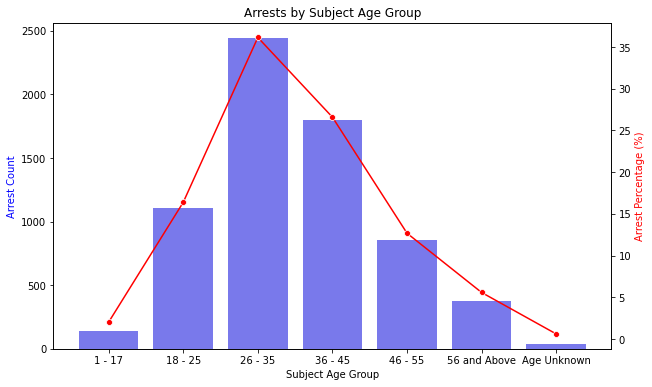

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x="Subject Age Group", y="Arrest Count", data=arrest_age, ax=ax1, color="b", alpha=0.6)
ax2 = ax1.twinx()
sns.lineplot(x="Subject Age Group", y="Arrest Percentage", data=arrest_age, ax=ax2, color="r", marker="o")
ax1.set_xlabel("Subject Age Group")
ax1.set_ylabel("Arrest Count", color="b")
ax2.set_ylabel("Arrest Percentage (%)", color="r")
plt.title("Arrests by Subject Age Group")
plt.show()


ages in the range of 26-35 contibuted 36% of the arrests made followed by ages between 36 and 45 which contributed about 27%.Age group 1-17 accounted for the least arrests followed by ages 46-55 at 5.5%

In [13]:
q5 = """
SELECT "Precinct",COUNT("Precinct"),"Beat"
FROM df
WHERE "Arrest Flag" = 1
GROUP BY "Precinct"
"""
precinct_beat = pysqldf(q5)
precinct_beat

,Precinct,"COUNT(""Precinct"")",Beat
0,East,1021,G3
1,FK ERROR,4,99
2,North,1137,N2
3,OOJ,8,OOJ
4,South,967,R2
5,Southwest,658,F1
6,West,2606,M3
7,precinct Unknown,359,Beat UNKNOWN


West M3 beat accounted for the most of arrests with 2606 arrests made.this was followed by the north precinct which had 1137 arrests  

### 5.what is the relationship between officer experience and the arrest flag


In [14]:
q6 = """
SELECT "Officer YOB", 
       CAST(COUNT("Arrest Flag") AS INTEGER) AS arrest_count,ABS("Officer YOB"-2024)AS "Officer probable age"
FROM df
WHERE "Arrest Flag" == 1 AND "Officer probable age"<=53
GROUP BY "Officer YOB"
ORDER BY arrest_count DESC
LIMIT 10
"""
officer_experience = pysqldf(q6)
officer_experience


,Officer YOB,arrest_count,Officer probable age
0,1995,565,29
1,1989,479,35
2,1993,478,31
3,1992,455,32
4,1991,455,33
5,1987,451,37
6,1986,426,38
7,1990,416,34
8,1994,319,30
9,1988,277,36


For the above analysis we assume that the retirement age in seattle is 53 years therefore limiting our analysis to only officers who are below the age of 53.Most arrests were made by officers between the ages of 29 and 38.Assuming an officer joinsthe force at the age of 18 then we can conclude that officers with more than 10 years of experience made correct judgemennts based on terry traffic stops.

### Officers who initiated a terry stop but never made an arrest

In [15]:
q7 = """
SELECT "Officer YOB", 
       CAST(COUNT("Arrest Flag") AS INTEGER) AS arrest_count,ABS("Officer YOB"-2024)AS "Officer probable age"
FROM df
WHERE "Arrest Flag" ==0 AND "Officer probable age"<=53
GROUP BY "Officer YOB"
ORDER BY arrest_count DESC
LIMIT 10
"""
officer_experience = pysqldf(q7)
officer_experience


,Officer YOB,arrest_count,Officer probable age
0,1986,3596,38
1,1987,3353,37
2,1991,2971,33
3,1984,2949,40
4,1992,2892,32
5,1990,2733,34
6,1985,2679,39
7,1989,2558,35
8,1988,2338,36
9,1982,1921,42


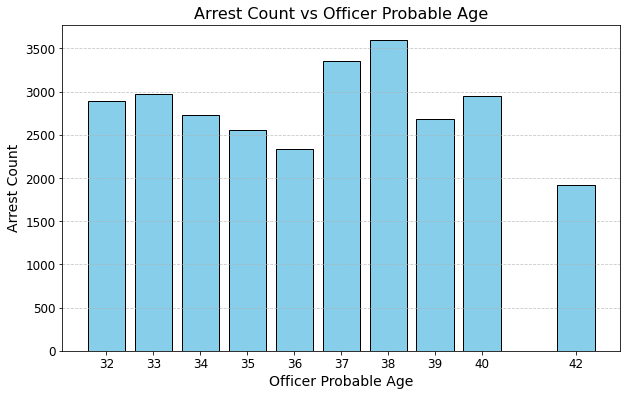

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(officer_experience["Officer probable age"], officer_experience["arrest_count"], color='skyblue', edgecolor='black')

# Customize the plot
plt.title("Arrest Count vs Officer Probable Age", fontsize=16)
plt.xlabel("Officer Probable Age", fontsize=14)
plt.ylabel("Arrest Count", fontsize=14)
plt.xticks(officer_experience["Officer probable age"],fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)



observation:
officers betweenthe ages of 32 and 42 initiated the most terry stops but did not make an arrest.this leads to the question is there a relationship between officer age and terry stops initiated?

### correlation between officer age and terry stops initiated

In [17]:
correlation=df["Officer YOB"].corr(df["Arrest Flag"])
correlation

0.13973448176624767

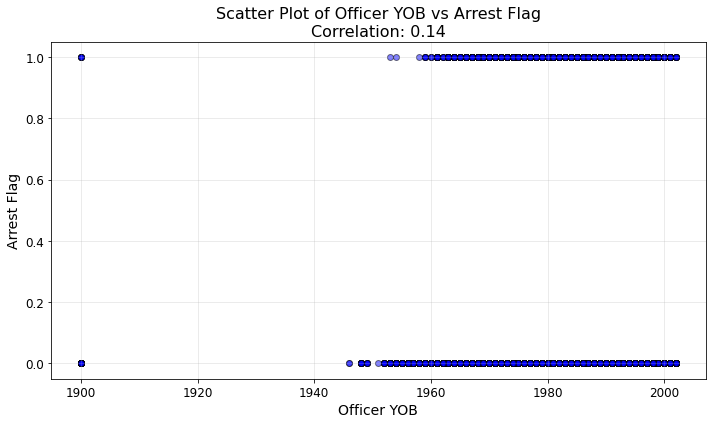

0.13973448176624767

In [18]:
# Creating a scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
plt.scatter(df["Officer YOB"], df["Arrest Flag"], color='blue', alpha=0.5, edgecolor='black')
plt.title(f"Scatter Plot of Officer YOB vs Arrest Flag\nCorrelation: {correlation:.2f}", fontsize=16)
plt.xlabel("Officer YOB", fontsize=14)
plt.ylabel("Arrest Flag", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
correlation


A correlation of 0.14 indicates a very week correlation.this indicates that there is no linear relationship between the officer age and terry stops.We can conclude that terry stops do not depend on any age and can be initiated by anny officer of any age.

### what is the relationship between date,day of the week and arrest flag

In [19]:
#Day of the week:monday:0,tuesday:1,wednesday:2,thursday:3,friday:4,saturday:5,sunday:6
q8="""
SELECT "reported_Month",day_of_week,COUNT("Arrest Flag") AS Arrests
FROM df
WHERE "Arrest Flag"==1
GROUP BY "reported_Month"
ORDER BY Arrests desc
"""
arrest_time=pysqldf(q8)
print(tabulate(arrest_time, headers="keys", tablefmt="fancy_grid"))

╒════╤══════════════════╤═══════════════╤═══════════╕
│    │   reported_Month │   day_of_week │   Arrests │
╞════╪══════════════════╪═══════════════╪═══════════╡
│  0 │                5 │             3 │       670 │
├────┼──────────────────┼───────────────┼───────────┤
│  1 │                7 │             6 │       631 │
├────┼──────────────────┼───────────────┼───────────┤
│  2 │               10 │             4 │       625 │
├────┼──────────────────┼───────────────┼───────────┤
│  3 │               11 │             3 │       596 │
├────┼──────────────────┼───────────────┼───────────┤
│  4 │                9 │             5 │       585 │
├────┼──────────────────┼───────────────┼───────────┤
│  5 │                6 │             6 │       566 │
├────┼──────────────────┼───────────────┼───────────┤
│  6 │                8 │             1 │       539 │
├────┼──────────────────┼───────────────┼───────────┤
│  7 │                1 │             6 │       535 │
├────┼──────────────────┼───

The terry stops that led to arrest occured on friday through to
saturday.the top 5 months that recorded the highest number of arrests were May with 670 arrests.August,September,October November also registered high numbers of arrests .The least arrests were made in , December, January,February,March and April.

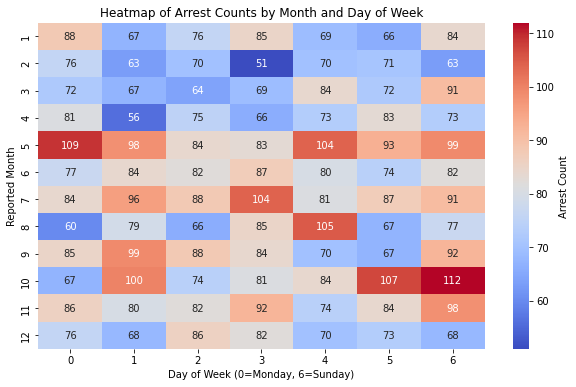

In [20]:
# Group by month and day of week, then pivot for heatmap data
heatmap_data =df.pivot_table(
    values='Arrest Flag',
    index='reported_Month',
    columns='day_of_week',
    aggfunc='sum',
    fill_value=0
)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="coolwarm", cbar_kws={'label': 'Arrest Count'})
plt.title("Heatmap of Arrest Counts by Month and Day of Week")
plt.xlabel("Day of Week (0=Monday, 6=Sunday)")
plt.ylabel("Reported Month")
plt.show()


the heatmap shows that terry stops on weekends  in the month of october would likely get you booked.Now that we have seen the months and days of the week one is likely to be arrested as a result of terry stop.lets examine if being found with a weapon at a certain time of the day would add salt to the already injured wound..

### does being found with a weapon or not likely to get you booked at a certain time of the day?

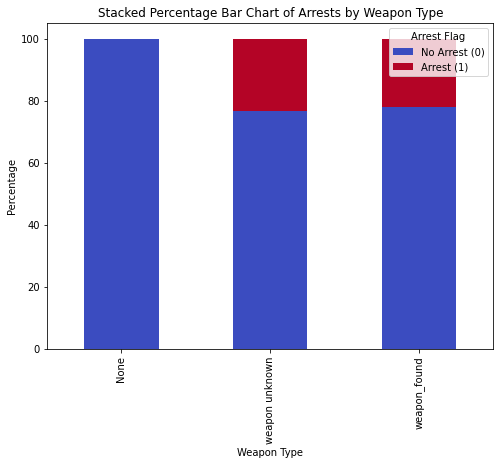

Arrest Flag,0,1
Weapon Type,,
None,99.978280,0.021720
weapon unknown,76.746665,23.253335
weapon_found,77.880421,22.119579


In [21]:

counts = df.groupby(["Weapon Type", "Arrest Flag"]).size().unstack(fill_value=0)

# Normalize counts to percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot stacked percentage bar chart
percentages.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="coolwarm")

# Add labels and title
plt.title("Stacked Percentage Bar Chart of Arrests by Weapon Type")
plt.xlabel("Weapon Type")
plt.ylabel("Percentage")
plt.legend(["No Arrest (0)", "Arrest (1)"], title="Arrest Flag")
plt.show()
percentages

when a suspect is not found with a weapon,99.97% of the time he is realeased.weapon type unknown accounted for  about 23% while weapon found accounted for 22% of the arrests.only 0.022%of people not found with a weapon are arrested.

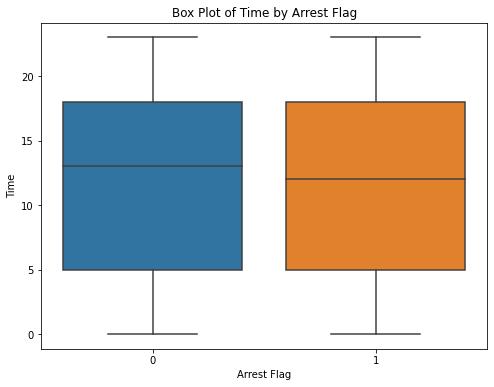

In [22]:
import seaborn as sns

# Box plot to compare the distribution of Time for Arrest Flag
plt.figure(figsize=(8, 6))
sns.boxplot(x='Arrest Flag', y='Time', data=df)
plt.title("Box Plot of Time by Arrest Flag")
plt.xlabel("Arrest Flag")
plt.ylabel("Time")
plt.show()


from the boxplot time of the day did not really  affect terry stop arrests.

## MODELLING AND EVALUATION

our model is to topredict if a terry stop will lead to an arrest or not.

In [23]:
mdata=df.copy()

In [24]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61459 entries, 0 to 61458
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subject Age Group  61459 non-null  object
 1   GO / SC Num        61459 non-null  int64 
 2   Stop Resolution    61459 non-null  object
 3   Weapon Type        61459 non-null  object
 4   Officer YOB        61459 non-null  int64 
 5   Initial Call Type  61459 non-null  object
 6   Final Call Type    61459 non-null  object
 7   Call Type          61459 non-null  object
 8   Officer Squad      61459 non-null  object
 9   Arrest Flag        61459 non-null  int64 
 10  Frisk Flag         61459 non-null  int64 
 11  Precinct           61459 non-null  object
 12  Sector             61459 non-null  object
 13  Beat               61459 non-null  object
 14  reported_Year      61459 non-null  int64 
 15  reported_Month     61459 non-null  int64 
 16  day_of_week        61459 non-null  int64

In [25]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61459 entries, 0 to 61458
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subject Age Group  61459 non-null  object
 1   GO / SC Num        61459 non-null  int64 
 2   Stop Resolution    61459 non-null  object
 3   Weapon Type        61459 non-null  object
 4   Officer YOB        61459 non-null  int64 
 5   Initial Call Type  61459 non-null  object
 6   Final Call Type    61459 non-null  object
 7   Call Type          61459 non-null  object
 8   Officer Squad      61459 non-null  object
 9   Arrest Flag        61459 non-null  int64 
 10  Frisk Flag         61459 non-null  int64 
 11  Precinct           61459 non-null  object
 12  Sector             61459 non-null  object
 13  Beat               61459 non-null  object
 14  reported_Year      61459 non-null  int64 
 15  reported_Month     61459 non-null  int64 
 16  day_of_week        61459 non-null  int64

In [26]:
#frequency encoding the object columns
class FrequencyEncoder:
    def __init__(self, data):
        self.data = data 

    def encode_column(self, column_name):
        frequency = self.data[column_name].value_counts()
        self.data[column_name] = self.data[column_name].map(frequency)

    def encode_columns(self, columns):
        for column in columns:
            self.encode_column(column)
    def get_data(self):
        return self.data
encoder = FrequencyEncoder(mdata)
columns_to_encode = ["Subject Age Group", "Stop Resolution", "Weapon Type", "Initial Call Type","Final Call Type","Officer Squad","Frisk Flag","Precinct","Sector","Beat","Call Type"]
encoder.encode_columns(columns_to_encode)
encoded_data = encoder.get_data()

In [27]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61459 entries, 0 to 61458
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Subject Age Group  61459 non-null  int64
 1   GO / SC Num        61459 non-null  int64
 2   Stop Resolution    61459 non-null  int64
 3   Weapon Type        61459 non-null  int64
 4   Officer YOB        61459 non-null  int64
 5   Initial Call Type  61459 non-null  int64
 6   Final Call Type    61459 non-null  int64
 7   Call Type          61459 non-null  int64
 8   Officer Squad      61459 non-null  int64
 9   Arrest Flag        61459 non-null  int64
 10  Frisk Flag         61459 non-null  int64
 11  Precinct           61459 non-null  int64
 12  Sector             61459 non-null  int64
 13  Beat               61459 non-null  int64
 14  reported_Year      61459 non-null  int64
 15  reported_Month     61459 non-null  int64
 16  day_of_week        61459 non-null  int64
 17  Time        

In [28]:
#spllitting the data into traing and test 
from sklearn.model_selection import train_test_split


In [29]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

data_with_constant = add_constant(mdata)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = data_with_constant.columns
vif["VIF"] = [
    variance_inflation_factor(data_with_constant.values, i)
    for i in range(data_with_constant.shape[1])
]

# Display VIF
print(vif)

              Feature        VIF
0               const   0.000000
1   Subject Age Group   1.006357
2         GO / SC Num   1.103506
3     Stop Resolution   1.518859
4         Weapon Type   1.356148
5         Officer YOB   1.207795
6   Initial Call Type   8.417151
7     Final Call Type   8.015802
8           Call Type   1.277958
9       Officer Squad   1.051114
10        Arrest Flag   1.248224
11         Frisk Flag   1.178598
12           Precinct   1.410396
13             Sector  16.663518
14               Beat  17.388017
15      reported_Year   0.204092
16     reported_Month   1.001086
17        day_of_week   1.001510
18               Time   1.006695


In [30]:
#dropping the initial call type 
mdata = mdata.drop(columns=["Initial Call Type","Beat"], axis=1)

In [31]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61459 entries, 0 to 61458
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Subject Age Group  61459 non-null  int64
 1   GO / SC Num        61459 non-null  int64
 2   Stop Resolution    61459 non-null  int64
 3   Weapon Type        61459 non-null  int64
 4   Officer YOB        61459 non-null  int64
 5   Final Call Type    61459 non-null  int64
 6   Call Type          61459 non-null  int64
 7   Officer Squad      61459 non-null  int64
 8   Arrest Flag        61459 non-null  int64
 9   Frisk Flag         61459 non-null  int64
 10  Precinct           61459 non-null  int64
 11  Sector             61459 non-null  int64
 12  reported_Year      61459 non-null  int64
 13  reported_Month     61459 non-null  int64
 14  day_of_week        61459 non-null  int64
 15  Time               61459 non-null  int64
dtypes: int64(16)
memory usage: 7.5 MB


In [32]:
data_with_constant = add_constant(mdata)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = data_with_constant.columns
vif["VIF"] = [
    variance_inflation_factor(data_with_constant.values, i)
    for i in range(data_with_constant.shape[1])
]

# Display VIF
print(vif)

              Feature       VIF
0               const  0.000000
1   Subject Age Group  1.006018
2         GO / SC Num  1.103474
3     Stop Resolution  1.513297
4         Weapon Type  1.349366
5         Officer YOB  1.204325
6     Final Call Type  1.873423
7           Call Type  1.220539
8       Officer Squad  1.050681
9         Arrest Flag  1.242092
10         Frisk Flag  1.177725
11           Precinct  1.071247
12             Sector  1.619135
13      reported_Year  0.203904
14     reported_Month  1.001021
15        day_of_week  1.001436
16               Time  1.006334


In [33]:
# splitting the data
y=mdata["Arrest Flag"]
X=mdata.drop(["Arrest Flag"],axis=1)

### Building a logistic regression baseline model

In [69]:
#checking for class imbalance
mdata["Arrest Flag"].value_counts(normalize=True)
#there is a great imbalance in the target with arrests made being only about 10%

0    0.890008
1    0.109992
Name: Arrest Flag, dtype: float64

In [75]:
#splitting the data into train and test data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)
#using smote to handle the class imbalance.
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42)
# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({0: 41062, 1: 5032})
After SMOTE: Counter({0: 41062, 1: 41062})


In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)


In [77]:
# instantiatingthe model
logreg=LogisticRegression(random_state=42)
#fitting the regression on the train dataset
reg_model=logreg.fit(X_resampled,y_resampled)
#making prediction on the test data
y_pred=reg_model.predict(X_test)

In [78]:
#evaluating the model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[12538,  1099],
       [   22,  1706]])

In [79]:
 #checking for accuracy score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9270419785226164

# building  a baseline decision tree classifier model


In [80]:
#scallling the training and test datasets.scalling is done after the split to prevent data leakage.
#train scalling
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [81]:
#creating a decision tree classifier 
clf = DecisionTreeClassifier(criterion='entropy',random_state=42)

In [89]:
#building a model
model_clf=clf.fit(X_resampled,y_resampled)

In [90]:
#predicting y based on the x_test
y_pred=model_clf.predict(X_test)

In [91]:
clf_conf_matrix=confusion_matrix(y_test,y_pred)
clf_conf_matrix

array([[13636,     1],
       [    1,  1727]])

In [92]:
test_class_report=classification_report(y_test,y_pred)
print(test_class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13637
           1       1.00      1.00      1.00      1728

    accuracy                           1.00     15365
   macro avg       1.00      1.00      1.00     15365
weighted avg       1.00      1.00      1.00     15365



In [104]:
#model performance on the train dataset
y_train_pred=model_clf.predict(X_resampled)
clf_train_conf_matrix=confusion_matrix(y_train_pred,y_resampled)
clf_train_conf_matrix
#class_report=classification_report(y_train_pred,y_train)
#print(class_report)

array([[41062,     0],
       [    0, 41062]])

In [94]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(clf, X_resampled, y_resampled, cv=5)
print("Cross-validation scores:", cross_val_scores)

Cross-validation scores: [0.99969559 1.         1.         1.         0.99993911]


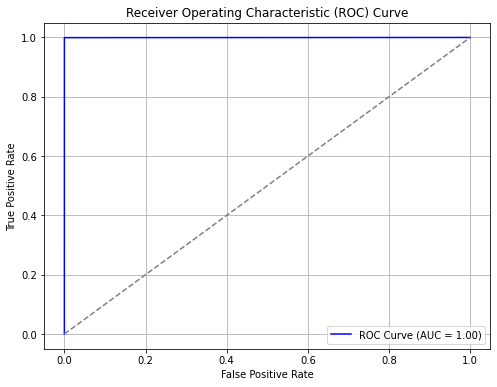

In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Get predicted probabilities for the positive class
y_pred_proba = model_clf.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


the model exhibit perfect performance in classifying the arrest flag.this may indicate an overfitting.

In [97]:
#Hyper parameter tuning to resolve the problem of overfitting
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
clf = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],           # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],    # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],           # Minimum number of samples to split an internal node
    'min_samples_leaf': [1, 5, 10],             # Minimum number of samples at a leaf node
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [98]:
#creating another model filling in the parameters
clf_tuned=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1,min_samples_split=20,random_state=42)

In [99]:
tuned_model=clf_tuned.fit(X_resampled,y_resampled)

In [100]:
y_pred1=tuned_model.predict(X_test)

In [101]:
#evaluating the performance of the model with the tuned parameters
con_matrix=confusion_matrix(y_test,y_pred1)
con_matrix

array([[13636,     1],
       [    1,  1727]])

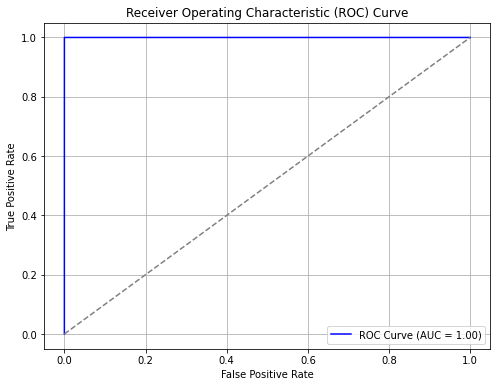

In [102]:
y_pred_proba = tuned_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()